# 研究中為了預估後續訓練的結果，故利用分群方法分析訓練資料。

# 以下code將分群以後不同的訓練資料圖像化，以方便團隊討論後續研究。

In [1]:
from sklearn.cluster import KMeans
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import ast

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import axes3d

In [12]:
fin_names = ['KRFP', 'KRFPC', 'SubFP', 'SubFPC', ]

#kmeans = joblib.load('./classify_model/PubchemFP/PubchemFP_10.pkl')

In [13]:
for fin_name in fin_names:
    fin = pd.read_csv(f'./finger/d0_{fin_name}.csv', index_col = 0)
    pca = joblib.load(f'./classify_model/{fin_name}/{fin_name}_PCA.pkl')
    kmeans = joblib.load(f'./classify_model/{fin_name}/{fin_name}_10.pkl')
    label = kmeans.predict(pca)
    smiles = fin.iloc[:,0]
    group = pd.DataFrame({'smiles':smiles, 'group':label})
    group.to_parquet(f'./classify_model/{fin_name}/{fin_name}_10.parquet')

C:\Users\h0928\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=21.
  warnings.warn(


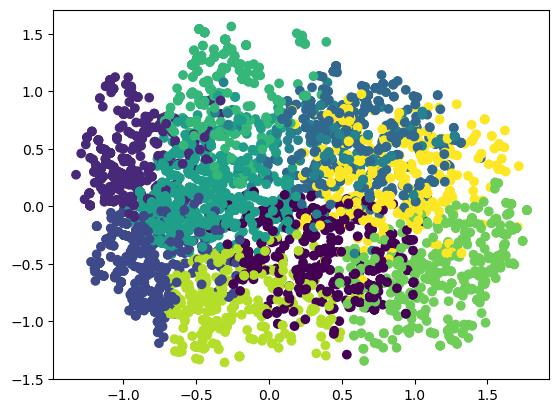

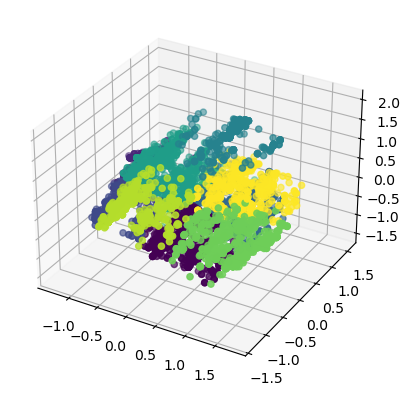

C:\Users\h0928\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=21.
  warnings.warn(


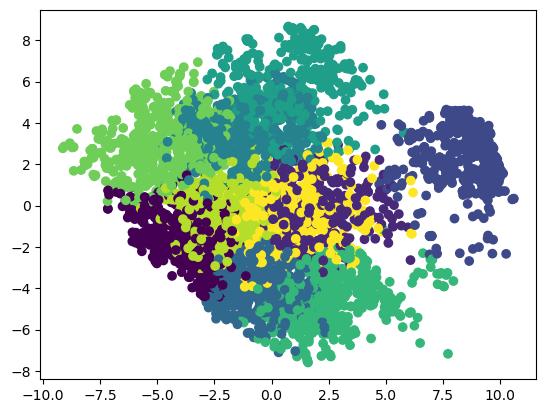

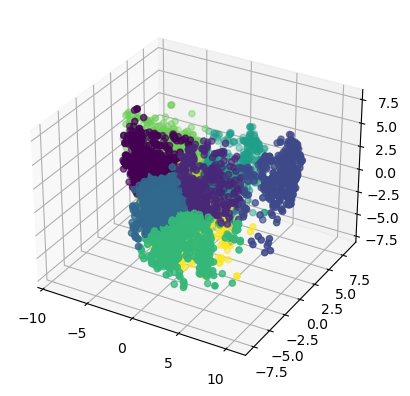

C:\Users\h0928\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=21.
  warnings.warn(


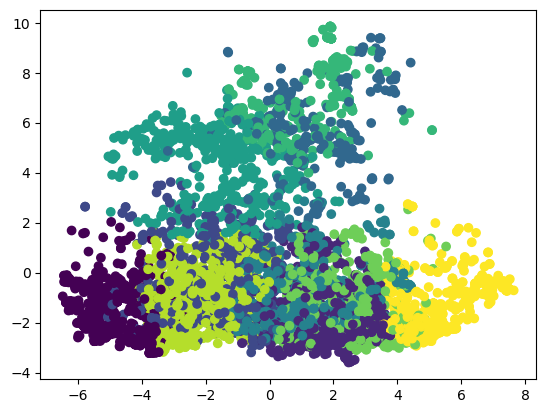

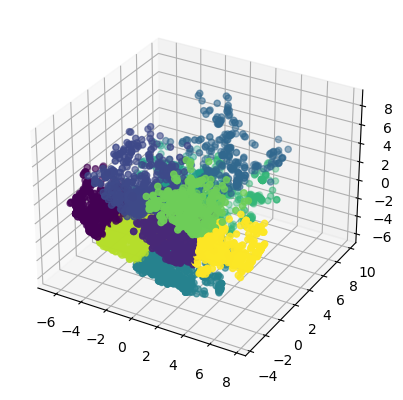

C:\Users\h0928\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=21.
  warnings.warn(


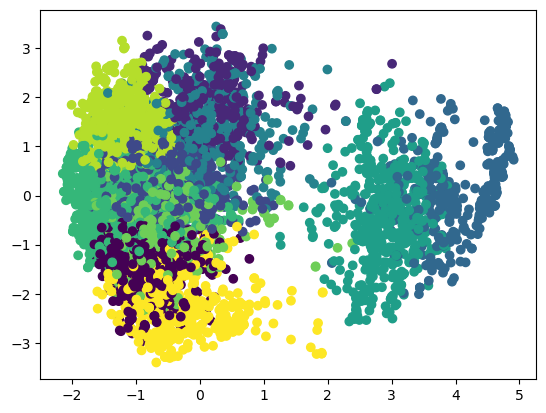

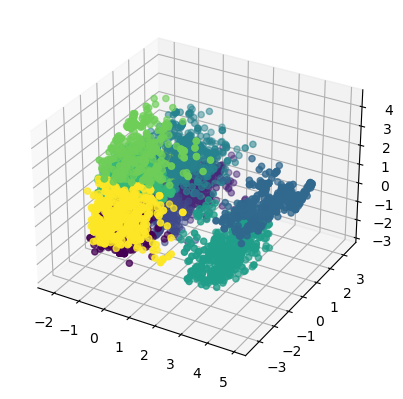

In [39]:
for fin_name in fin_names:
    fin = pd.read_csv(f'./finger/d0_{fin_name}.csv', index_col = 0)
    pca3=PCA(n_components=3)
    Xpcaed3 = pca3.fit_transform(fin.iloc[:,1:])
    pca2 = PCA(n_components=2)
    Xpcaed2 = pca2.fit_transform(fin.iloc[:,1:])
    kmeans = KMeans(n_clusters = 10).fit(Xpcaed3)
    joblib.dump(Xpcaed3,f'./classify_model/{fin_name}/{fin_name}_PCA.pkl')
    joblib.dump(kmeans,f'./classify_model/{fin_name}/{fin_name}_10.pkl')
    joblib.dump(Xpcaed2,f'./classify_model/{fin_name}/{fin_name}_PCA2d.pkl')
    label = []
    smiles = fin.iloc[:,0]
    for i in kmeans.labels_:
        label.append(i)

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(Xpcaed2[:,0], Xpcaed2[:,1], c=label)
    plt.savefig(f'./classify_model/{fin_name}/pca2d.png')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(Xpcaed3[:,0], Xpcaed3[:,1], Xpcaed3[:,2], c=label)
    plt.savefig(f'./classify_model/{fin_name}/pca3d.png')
    plt.show()

In [33]:
label = []
smiles = fin.iloc[:,0]
for i in kmeans.labels_:
    label.append(i)

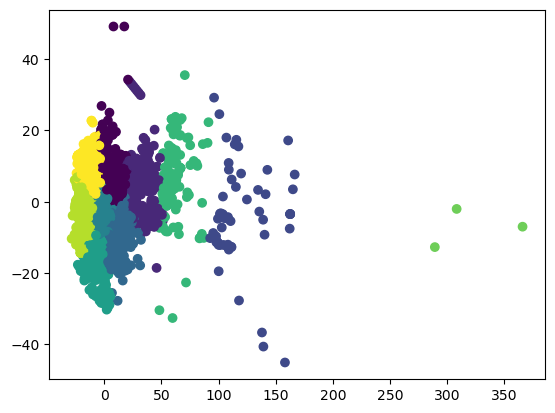

In [34]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(Xpcaed2[:,0], Xpcaed2[:,1], c=label)

plt.show()
plt.savefig(f'./classify_model/{fin_name}/pca2d.png')

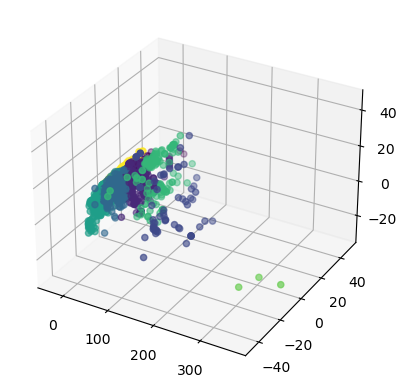

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(Xpcaed3[:,0], Xpcaed3[:,1], Xpcaed3[:,2], c=label)

plt.show()
plt.savefig(f'./classify_model/{fin_name}/pca3d.png')